# Assignment 5 - Clustering

### Objective : 
To evaluate your understanding and ability to apply clustering techniques to a real-world dataset. 

### Dataset
Use the Iris dataset available in the sklearn library.

### 1. Loading and Preprocessing (1 marks) 
Load the Iris dataset from sklearn. 

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_iris

In [17]:
data = load_iris()

In [19]:
x = data.data
y = data.target
feature_name = data.feature_names

In [23]:
df = pd.DataFrame(x,columns = feature_name)
df['target'] = y

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [35]:
df.shape

(150, 5)

In [37]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [39]:
df.duplicated().sum()

1

In [43]:
df.drop_duplicates(inplace = True)

In [45]:
df.duplicated().sum()

0

#### Drop the species column since this is a clustering problem.

Here species is classified in target column, So it is removing. As clustering is an unsupervised model there is no need of target column.

In [58]:
df.drop(columns = 'target',inplace = True)

In [60]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
correlation = df.corr()

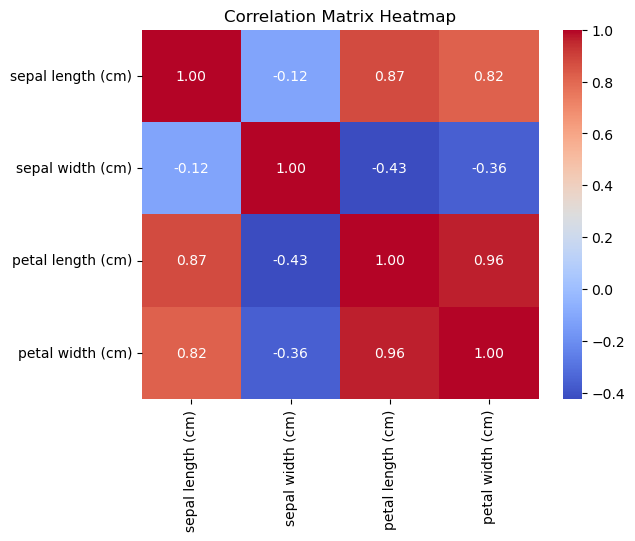

In [67]:
# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [71]:
num_columns = df.select_dtypes(include = 'number')

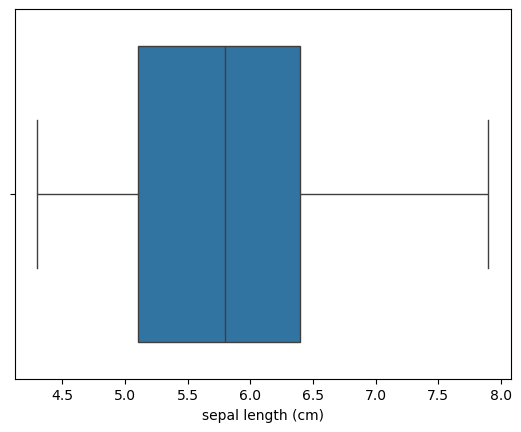

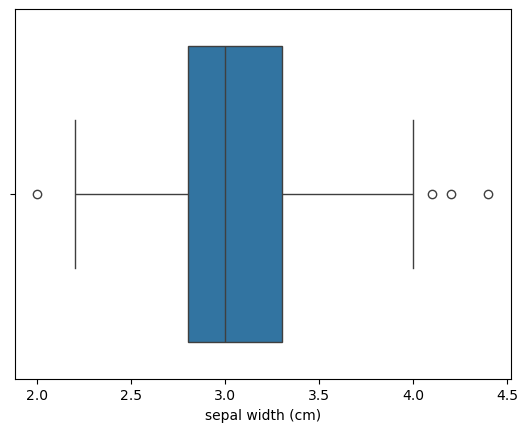

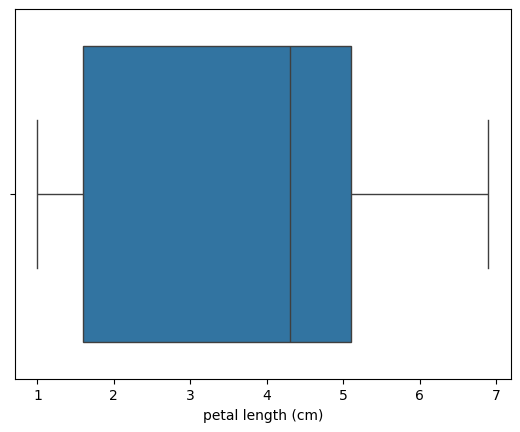

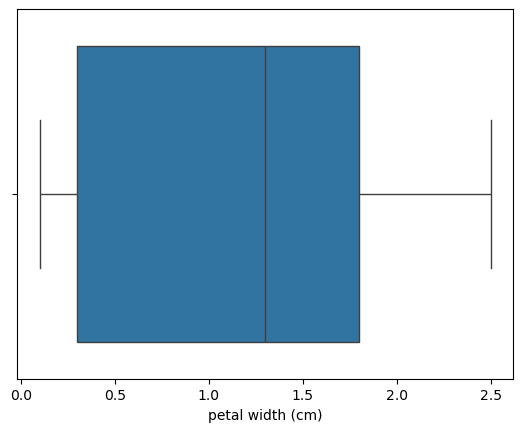

In [73]:
for i in num_columns.columns:
    sns.boxplot(data = df, x = i)
    plt.show()

In [75]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [77]:
df1 = outliers(df)

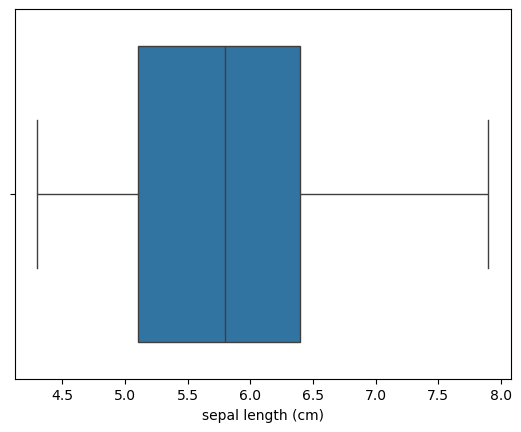

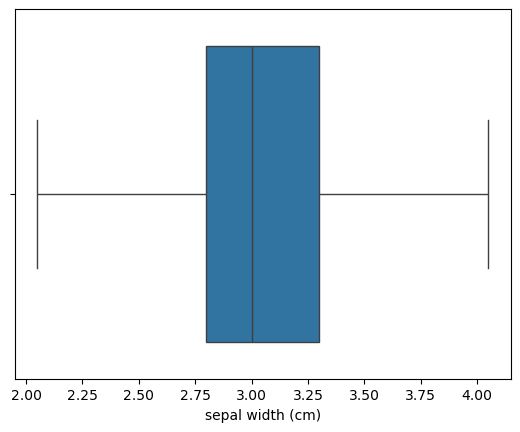

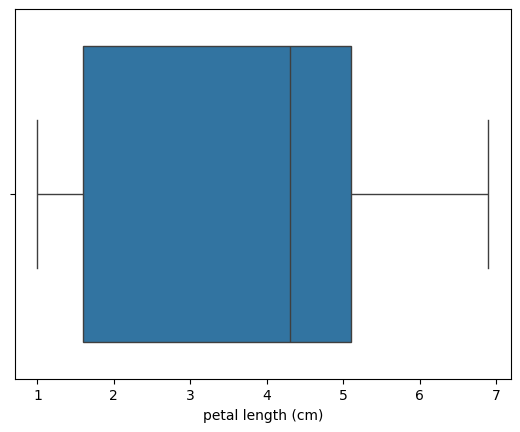

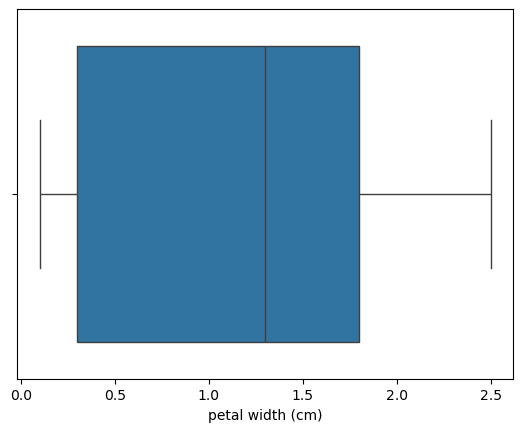

In [79]:
for i in num_columns.columns:
    sns.boxplot(data = df1, x = i)
    plt.show()

In [81]:
df1.skew()

sepal length (cm)    0.312826
sepal width (cm)     0.182187
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

In [85]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [87]:
df2 = df1[numerical_features]

In [89]:
correlation = df2.corr()

In [91]:
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.119293,0.873738,0.820620
sepal width (cm),-0.119293,1.000000,-0.425425,-0.362030
petal length (cm),0.873738,-0.425425,1.000000,0.962772
petal width (cm),0.820620,-0.362030,0.962772,1.000000


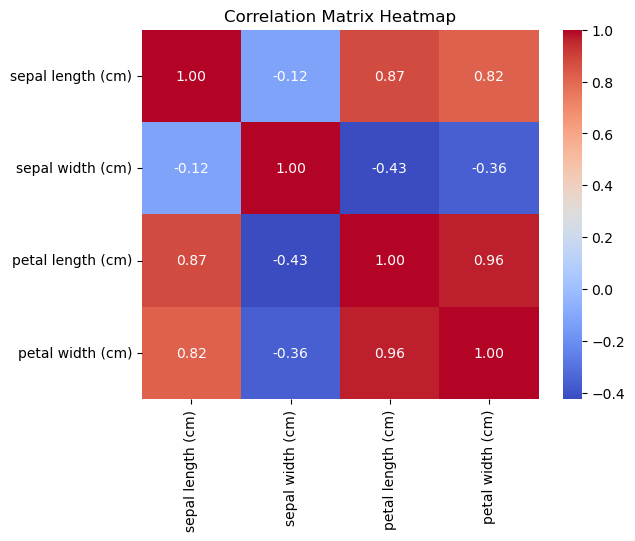

In [93]:
# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### 2.Clustering Algorithm Implementation

#### A) K-Means Clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.


### Why K-Means clustering might be suitable for the Iris dataset?

K-Means clustering is suitable for the Iris dataset because it is an unsupervised algorithm that can effectively group data points based on their features, and the Iris dataset contains well-defined numerical features (sepal length, sepal width, petal length, and petal width). These features provide clear separations between species in a multi-dimensional space, making it ideal for K-Means, which works by minimizing intra-cluster distances. Additionally, the Iris dataset is small, balanced, and has roughly spherical clusters, aligning well with the assumptions of K-Means. This allows the algorithm to group the data into three clusters that can correspond to the three species (setosa, versicolor, virginica) without relying on labeled data.

In [99]:
X = df2

In [95]:
dfc=df1.copy()

In [118]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(dfc)
X=pd.DataFrame(x_scaled)

In [122]:
X.head()

,0,1,2,3
0,-0.898033,1.045312,-1.333255,-1.308624
1,-1.139562,-0.132838,-1.333255,-1.308624
2,-1.381091,0.338422,-1.390014,-1.308624
3,-1.501855,0.102792,-1.276496,-1.308624
4,-1.018798,1.280942,-1.333255,-1.308624


#### Elbow method :
The Elbow Method is a technique used in KMeans clustering to determine the optimal number of clusters (K) for a dataset. It works by plotting the within-cluster sum of squares (WCSS) against different values of K and looking for the "elbow point" in the graph. The elbow point is where the rate of decrease in WCSS slows significantly, indicating that adding more clusters does not provide substantial improvement in clustering performance. This optimal K balances model simplicity and accuracy, avoiding both underfitting and overfitting.

In [124]:
sse = []  #WCSS  - sum of squares
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method')

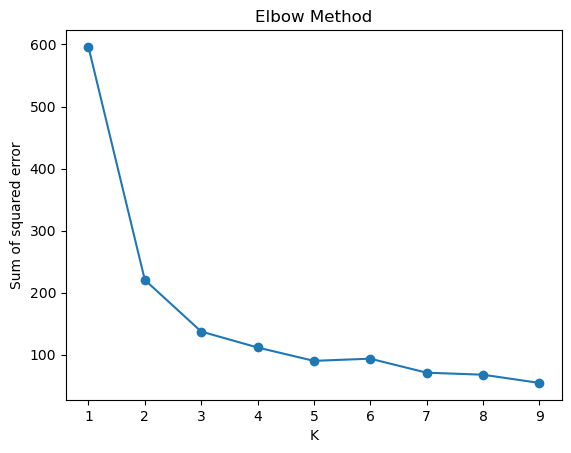

In [128]:
plt.plot(k_range,sse,marker='o')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')

#### From this taking K=5 as optimal clustering size.

In [132]:
k=5
kmeans=KMeans(n_clusters=5,random_state=42)
X['Cluster']=kmeans.fit_predict(X)
X.head()

,0,1,2,3,Cluster
0,-0.898033,1.045312,-1.333255,-1.308624,1
1,-1.139562,-0.132838,-1.333255,-1.308624,1
2,-1.381091,0.338422,-1.390014,-1.308624,1
3,-1.501855,0.102792,-1.276496,-1.308624,1
4,-1.018798,1.280942,-1.333255,-1.308624,2


#### Clusters are formed

Using PCA (Dimensionality reduction) for ploting a better clustered scatter plot.

In [135]:
# Assuming `X` is your DataFrame or scaled data
if isinstance(X, pd.DataFrame):
    X.columns = X.columns.astype(str)  # Ensure column names are strings

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0 -2.374493 -0.951298
1 -2.402952 -0.039455
2 -2.574296 -0.427852
3 -2.561216 -0.215163
4 -1.848186 -1.645099


### Plotting

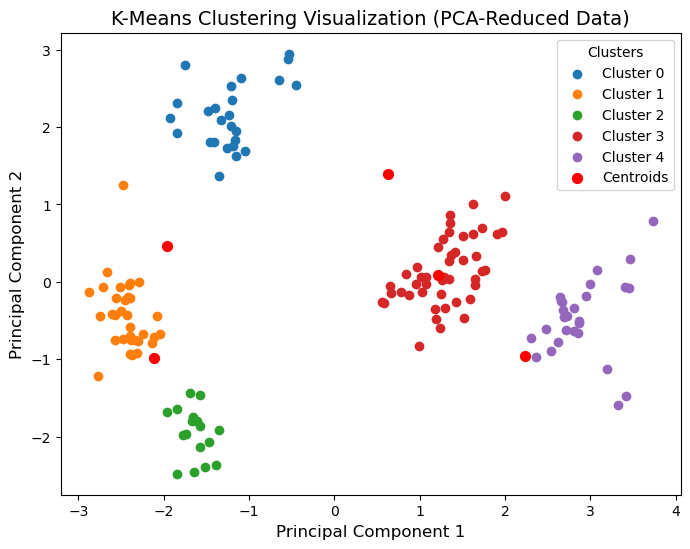

In [168]:
# Assuming `pca_df` is your DataFrame containing PC1, PC2, and cluster labels
pca_df['Cluster'] = X['Cluster']  # Add cluster labels to pca_df

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Adding cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_pca = PCA(n_components=2).fit_transform(cluster_centers)  # Transform cluster centers using PCA
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
            c='red', marker='o', s=50, label='Centroids')

# Customizing the plot
plt.title('K-Means Clustering Visualization (PCA-Reduced Data)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Clusters')
plt.show()


### B) Hierarchical Clustering

Hierarchical clustering is a clustering technique that groups data points into a hierarchy of clusters. It operates either in a divisive (top-down) or agglomerative (bottom-up) manner. Agglomerative clustering starts with each data point as its own cluster and iteratively merges the closest clusters based on a distance metric (e.g., Euclidean) until all points form a single cluster. Divisive clustering does the reverse, splitting one large cluster into smaller clusters. The results are visualized using a dendrogram, which shows the merging or splitting process and helps determine the optimal number of clusters by cutting the dendrogram at a specific level. Hierarchical clustering is particularly useful for understanding nested cluster relationships.

### Why Hierarchical Clustering for Iris dataset?
Hierarchical clustering is important in the Iris dataset as it helps uncover natural groupings of the three flower species (Setosa, Versicolor, Virginica) without requiring predefined labels. It provides a dendrogram that visually represents the clustering process, offering insights into how data points and species are related at different levels. By leveraging distance-based metrics, hierarchical clustering identifies patterns in the petal and sepal measurements, making it a powerful tool for exploratory data analysis and understanding the dataset’s structure.

In [141]:
dfc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
#  Create a linkage matrix using scipy's linkage function
Z = linkage(dfc, method='ward')  # 'ward' minimizes variance within clusters

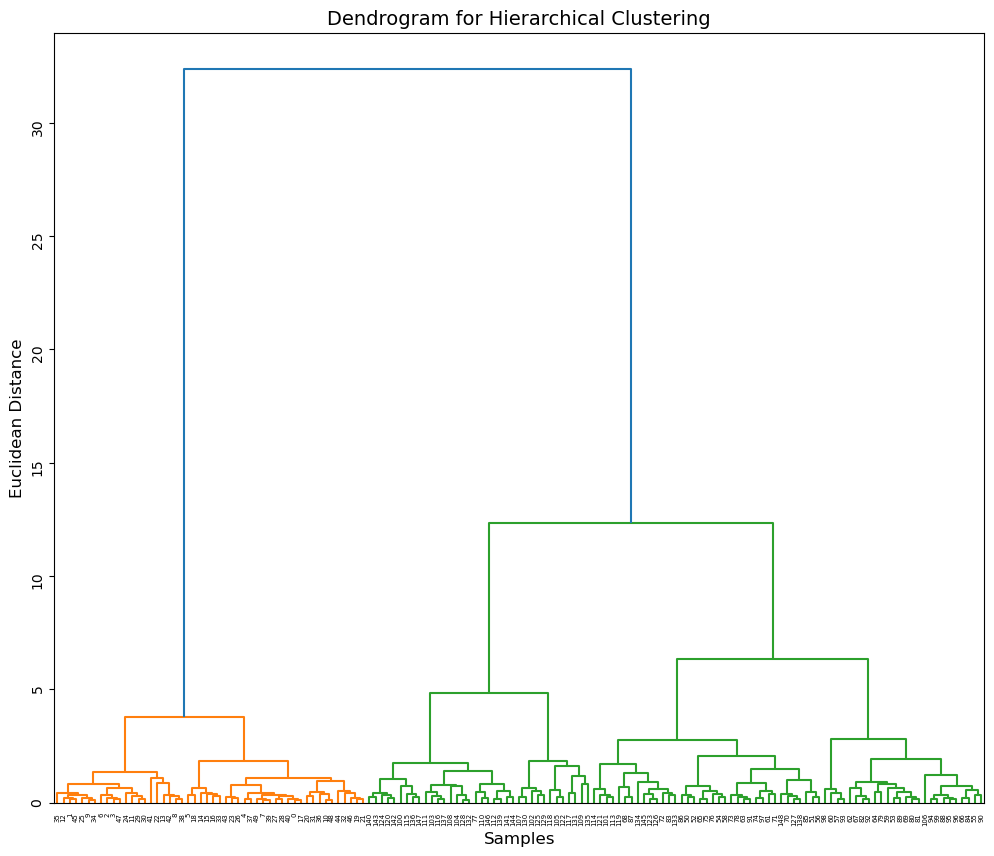

In [153]:
# Step 3: Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(12, 10))
dend = shc.dendrogram(shc.linkage (dfc, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering', fontsize=14)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.yticks(rotation=90)
plt.show()

In [155]:
uniquecolors = set(dend["color_list"])
uniquecolors

{'C0', 'C1', 'C2'}

In [157]:
optimal_number_of_clusters = len(uniquecolors)-1
optimal_number_of_clusters


2

In [159]:
clusters = AgglomerativeClustering(n_clusters = optimal_number_of_clusters, metric="euclidean", linkage="ward")
clusters.fit_predict(dfc)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [161]:
dfc['cluster']=clusters.fit_predict(dfc)
dfc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### Plot using Agglomerative clustering

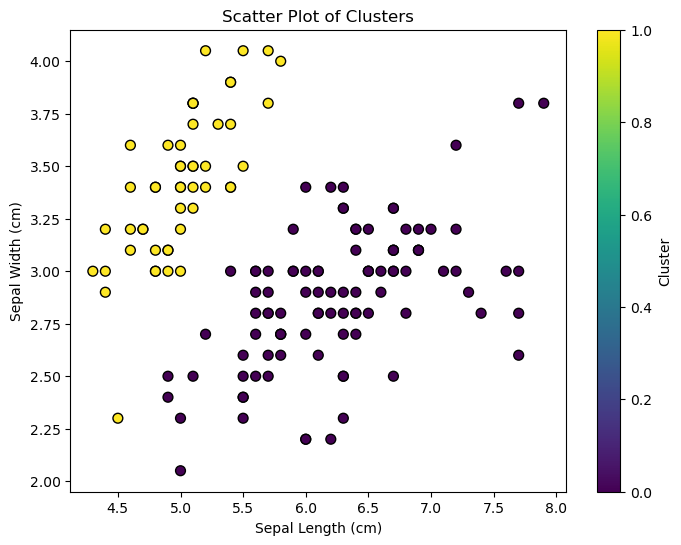

In [164]:
# Extracting features and clusters
x = dfc['sepal length (cm)']  # Choose one feature for x-axis
y = dfc['sepal width (cm)']   # Choose another feature for y-axis
clusters = dfc['cluster']     # Cluster assignments

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=clusters, cmap='viridis', s=50, edgecolor='k')

# Adding labels and title
plt.title('Scatter Plot of Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(scatter, label='Cluster')  # Add colorbar to show cluster mapping
plt.show()